In [1]:
import pandas as pd
import xlrd

In [ ]:
#https://public.tableau.com/s/resources?qt-overview_resources=1
#https://public.tableau.com/app/sample-data/pokemon.xlsx

In [3]:
xls = pd.ExcelFile("D:/RAMANASOFT/pokemon.xlsx")

In [4]:
xls.sheet_names

['Pokemon', 'Moves', 'Evolution', 'TypeChart']

In [5]:
df1= pd.read_excel(xls,"Pokemon")

In [6]:
df1.columns

Index(['#', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense',
       'Special Attack', 'Special Defense', 'Speed'],
      dtype='object')

In [7]:
df1.dtypes

#                  object
Name               object
Type               object
Total               int64
HP                  int64
Attack              int64
Defense             int64
Special Attack      int64
Special Defense     int64
Speed               int64
dtype: object

In [17]:
df1.shape

(1168, 10)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Total', ylabel='Attack'>

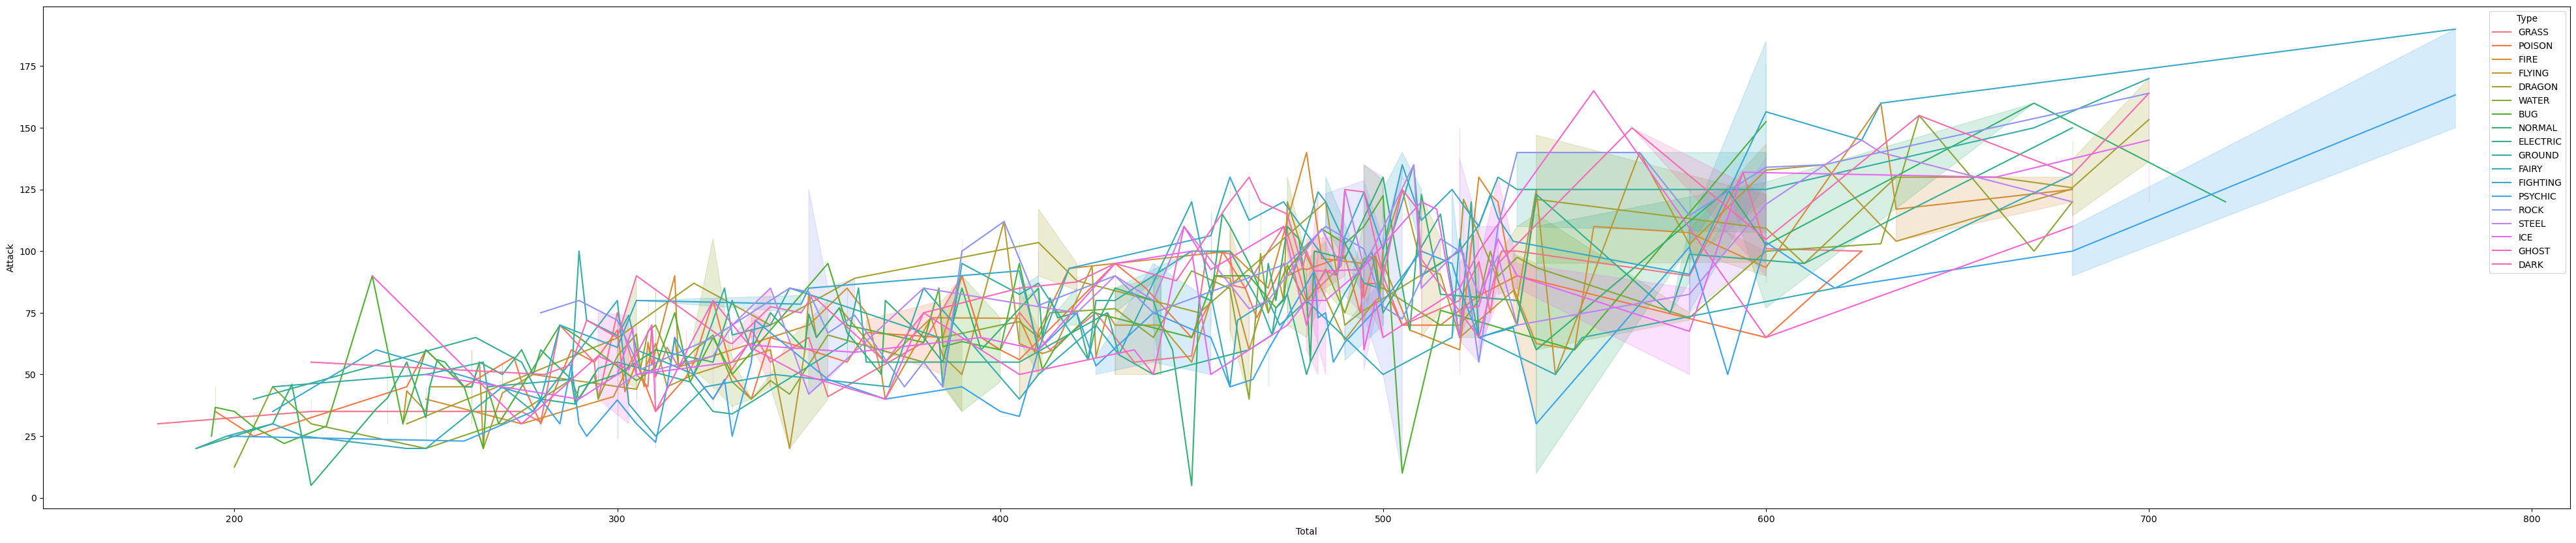

In [11]:
plt.figure(figsize=(50,10))
sns.lineplot(x='Total',y='Attack',hue = 'Type',data=df1)

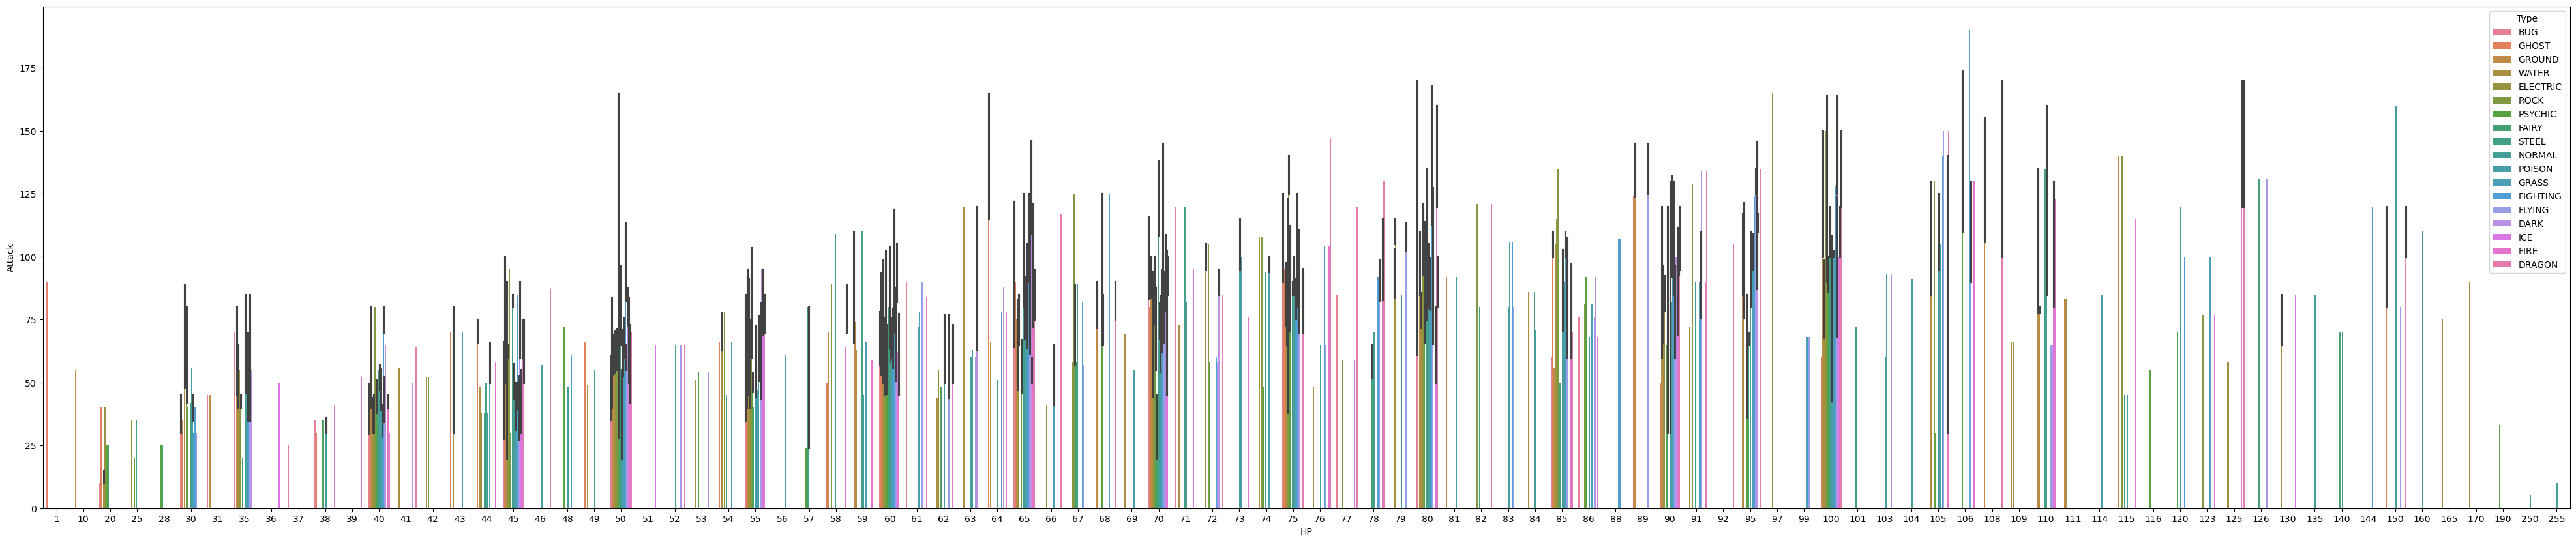

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
g=sns.barplot(x='HP',y='Attack',hue ='Type',data=df1)

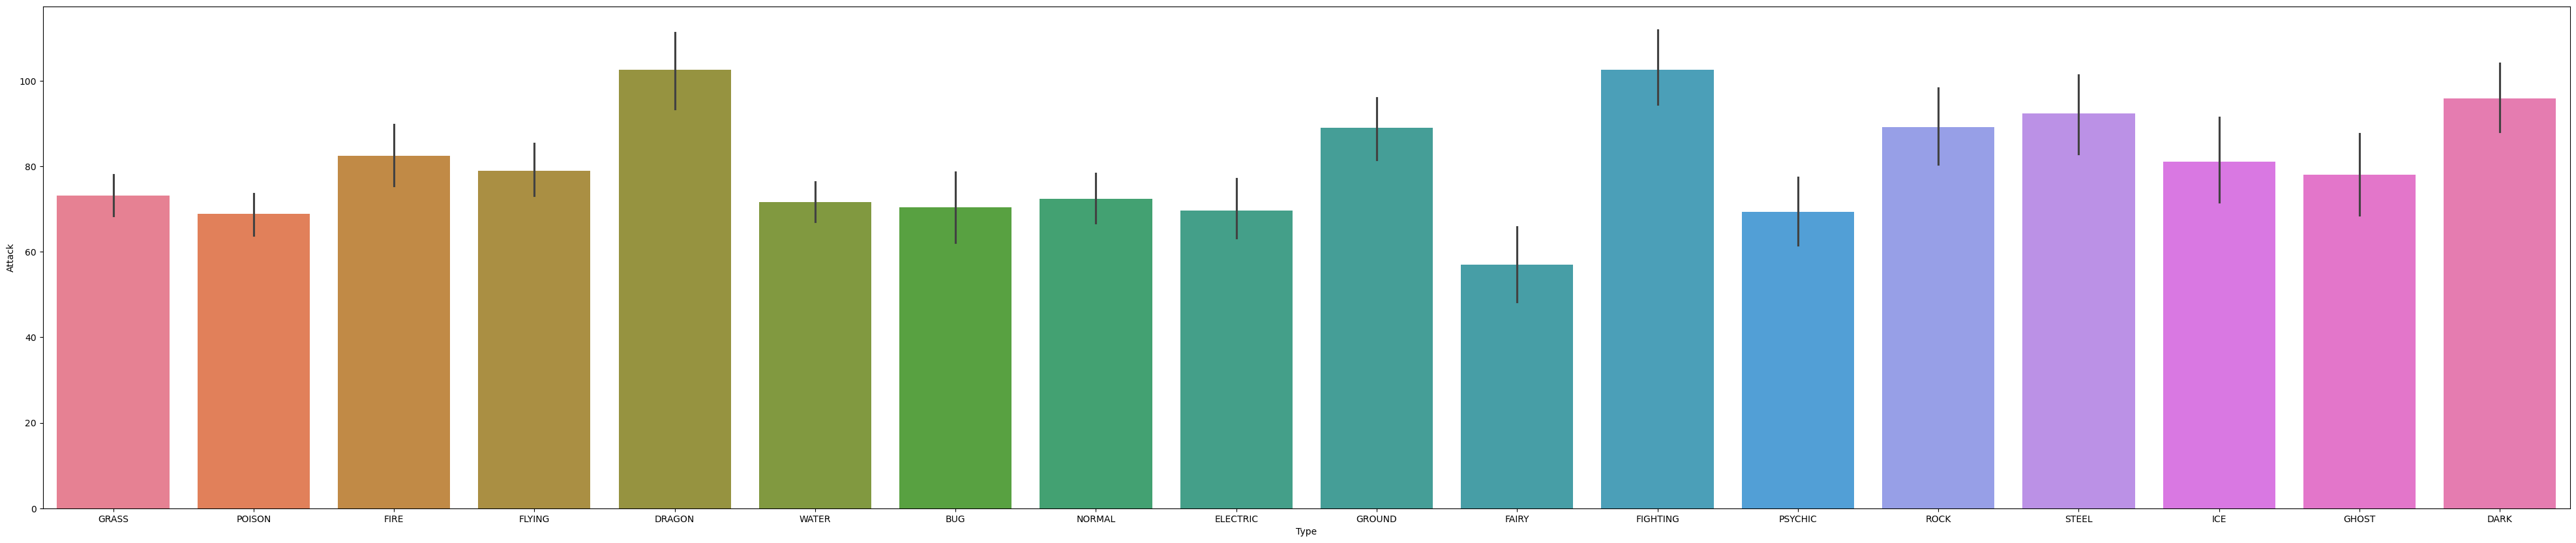

In [22]:
plt.figure(figsize=(50, 10))
g=sns.barplot(x='Type',y='Attack',hue='Type',data=df1)

In [24]:
df2=df1.drop(['#','Type','Total','Name'],axis=1)

In [25]:
df2.columns

Index(['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense',
       'Speed'],
      dtype='object')

In [36]:
df2.describe(include='all')

,HP,Attack,Defense,Special Attack,Special Defense,Speed
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,69.525685,78.815925,74.369863,72.619007,71.715753,68.586473
std,24.919600,31.714658,30.761824,31.770755,27.265611,28.315690
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,47.000000
50%,66.000000,75.000000,70.000000,65.000000,70.000000,65.500000
75%,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   HP               1168 non-null   int64
 1   Attack           1168 non-null   int64
 2   Defense          1168 non-null   int64
 3   Special Attack   1168 non-null   int64
 4   Special Defense  1168 non-null   int64
 5   Speed            1168 non-null   int64
dtypes: int64(6)
memory usage: 54.9 KB


In [38]:
df2

,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,45,49,49,65,65,45
1,45,49,49,65,65,45
2,60,62,63,80,80,60
3,60,62,63,80,80,60
4,80,82,83,100,100,80
...,...,...,...,...,...,...
1163,126,131,95,131,98,99
1164,126,131,95,131,98,99
1165,126,131,95,131,98,99
1166,108,100,121,81,95,95


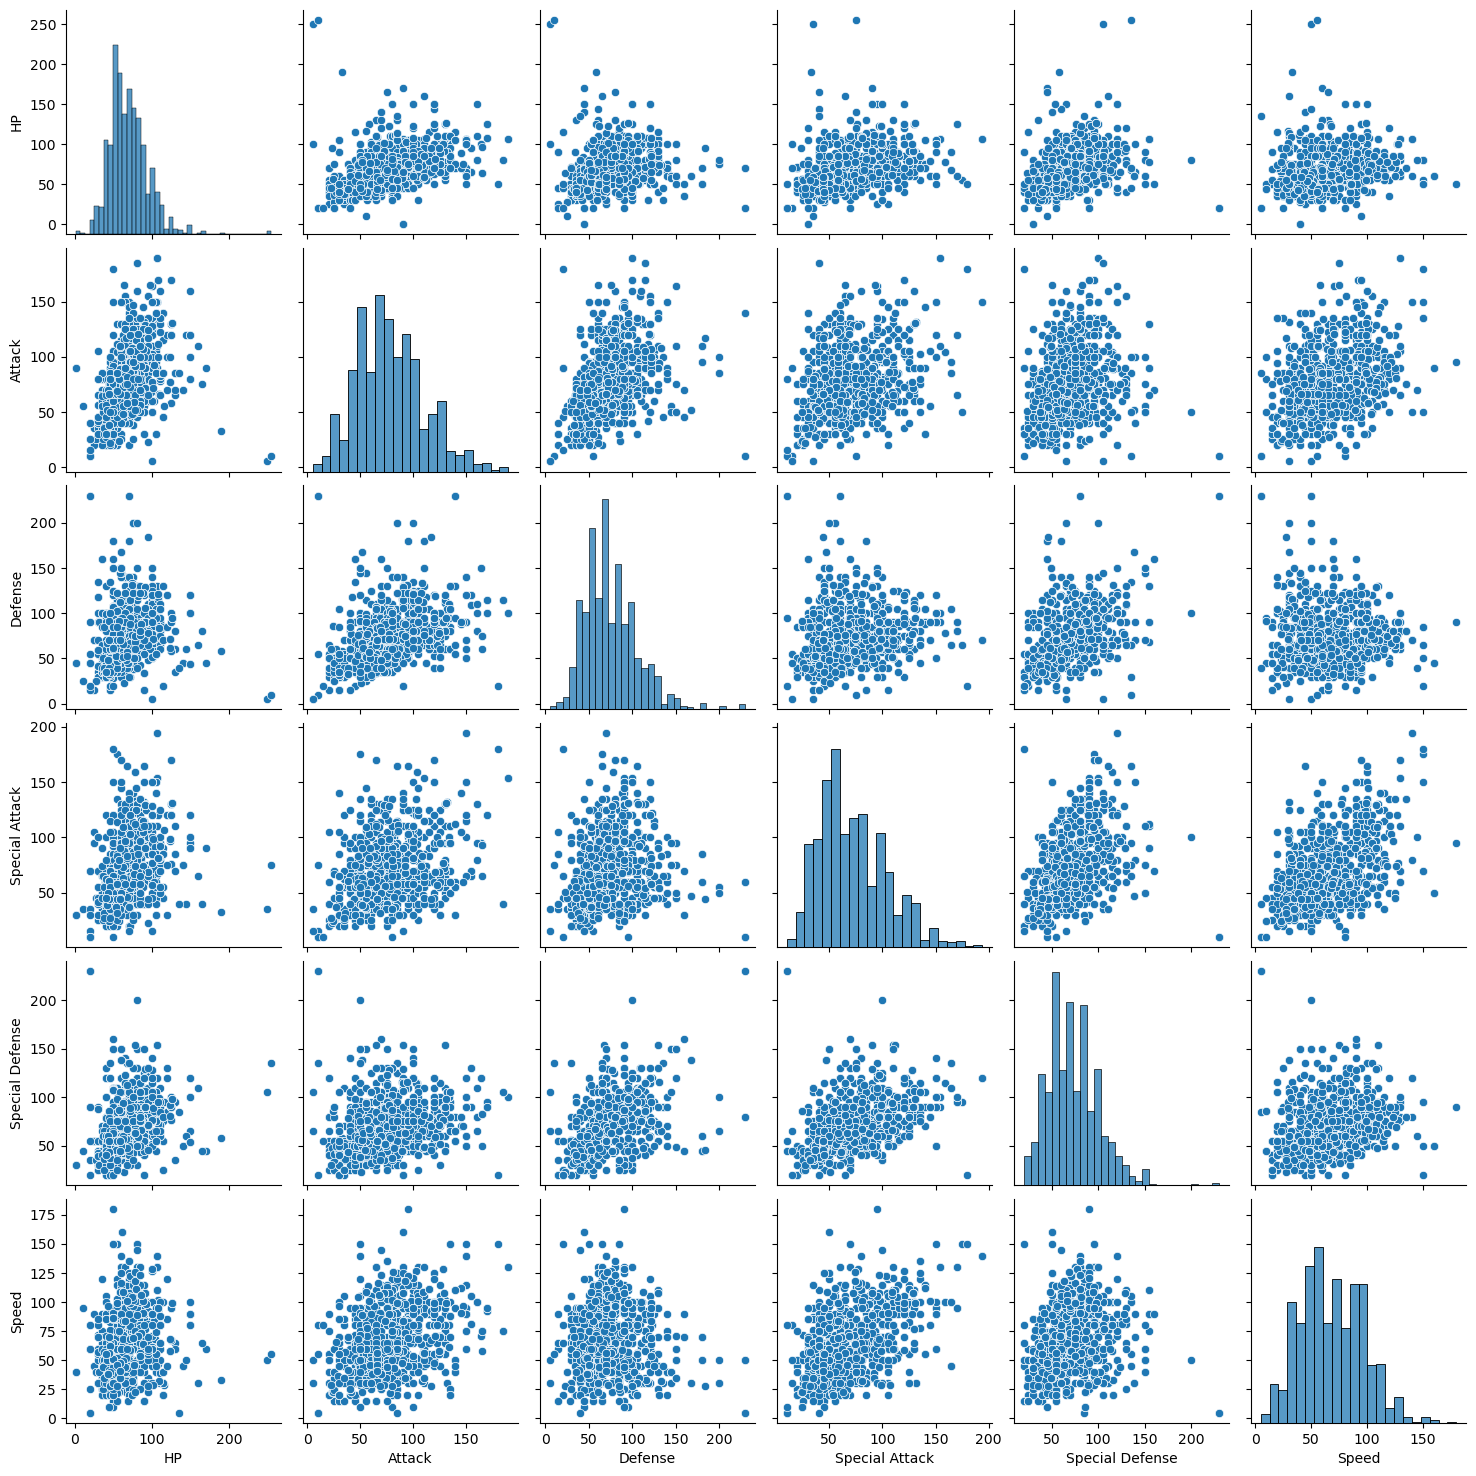

In [39]:
sns.pairplot(data=df2)

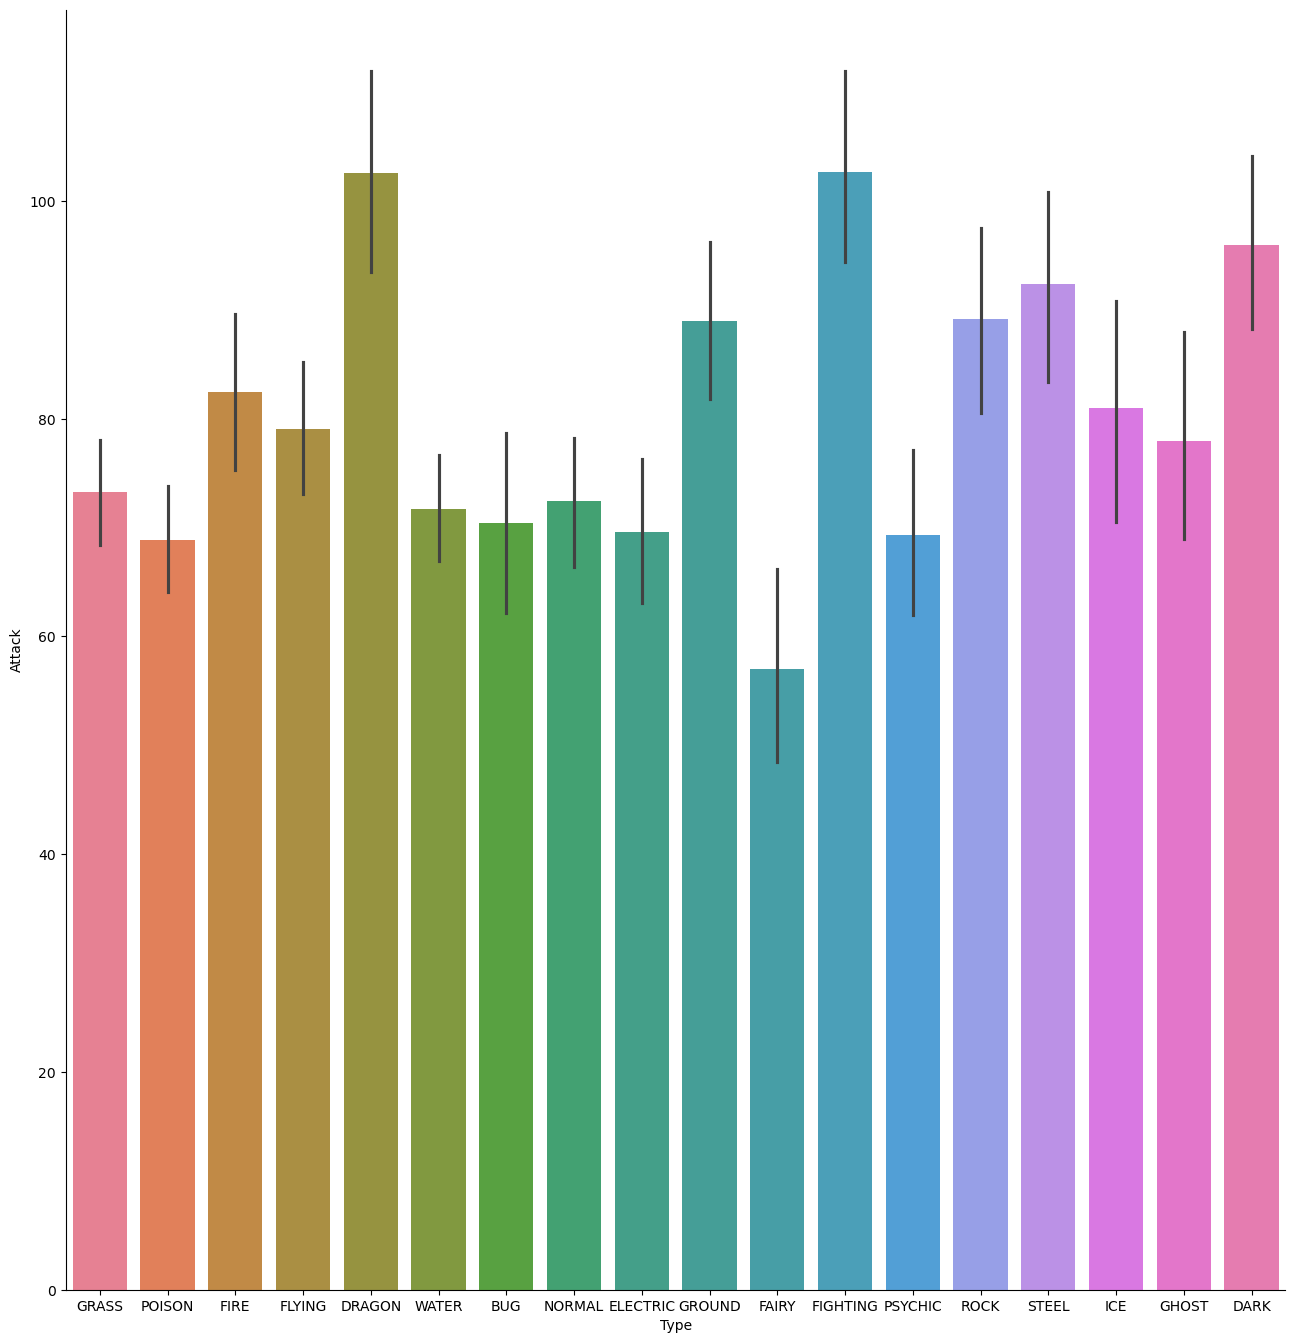

In [42]:
g=sns.catplot(x='Type',y='Attack',kind='bar',hue='Type',data=df1)
g.fig.set_size_inches(15,15)

<Axes: xlabel='Total', ylabel='Attack'>

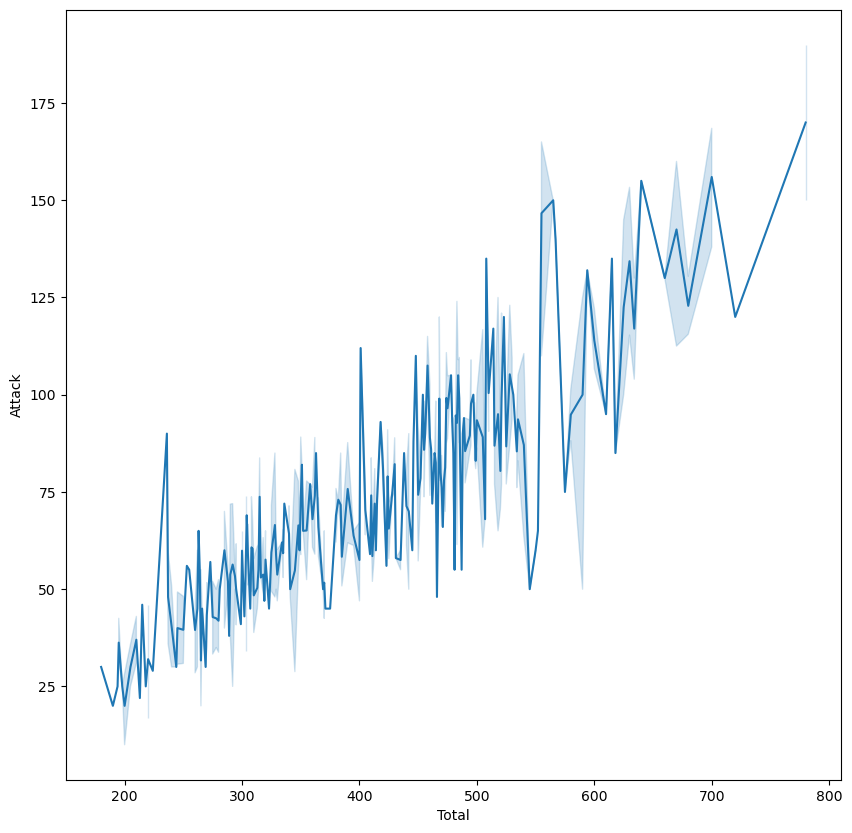

In [43]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Total',y='Attack',data=df1)

<Axes: xlabel='Attack', ylabel='Count'>

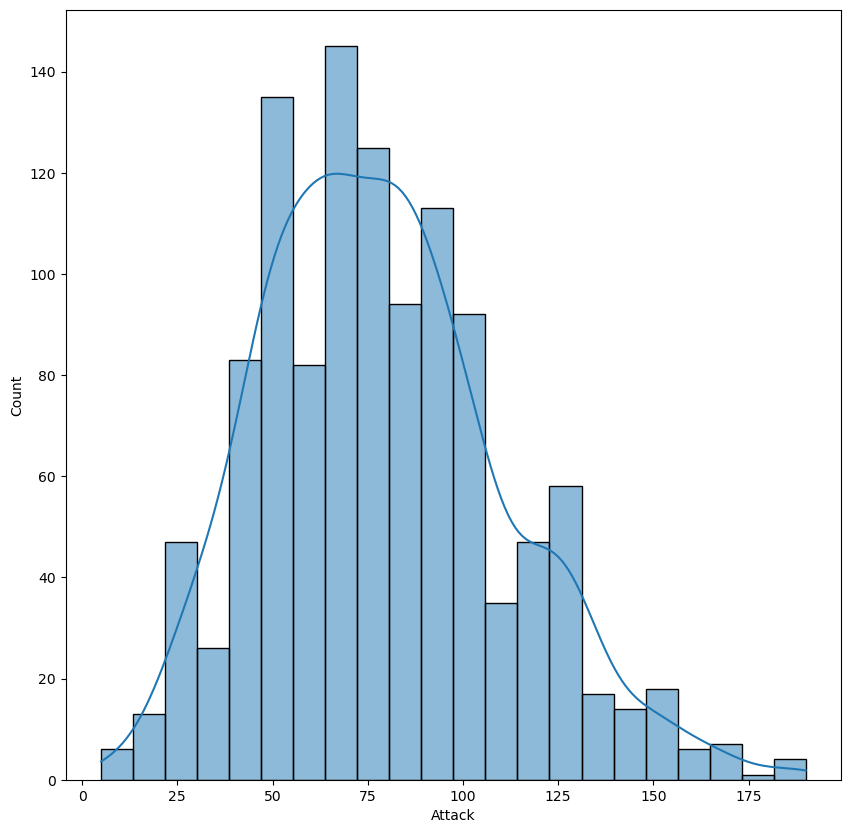

In [46]:
plt.figure(figsize=(10, 10))
sns.histplot(df1.Attack,kde= True)

C:\Users\emman\AppData\Local\Temp\ipykernel_14376\3609392344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Speed)


<Axes: xlabel='Speed', ylabel='Density'>

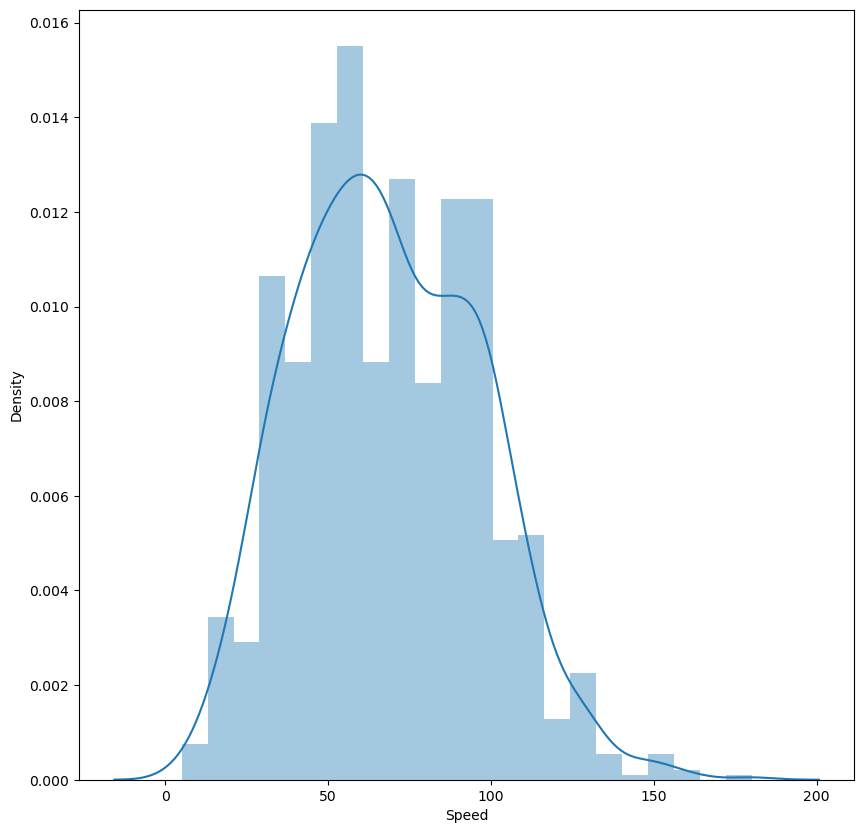

In [49]:
plt.figure(figsize=(10,10))
sns.distplot(df1.Speed)

In [50]:
pip install jupyterlab

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: jupyterlab in d:\ju\lib\site-packages (4.2.5)



In [51]:
pip install jupyterlab-lsp

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install openai

   ---------------------------------------- 0.0/661.2 kB ? eta -:--:--
   ---------------------------------------- 661.2/661.2 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
import openai
import os

# Set your OpenAI API key (it's better to store this securely, e.g., as an environment variable)
openai.api_key = os.environ.get("OPENAI_API_KEY")  # Or replace with your actual key

def get_chatgpt_response(prompt):
    """Sends a prompt to ChatGPT and returns the response."""
    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",  # Or a different model like "gpt-4"
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {e}"

# Example usage
query = "Explain the concept of recursion in Python with a simple example."
response = get_chatgpt_response(query)
print(response)

query_code = "Write a Python function to calculate the factorial of a number."
code_response = get_chatgpt_response(query_code)
print(code_response)

Error: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable
Error: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable
